In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 45.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=c7ea8a459c8f09c85947edbff5e56b17a18098c8e87f41f9f6d6cd459c717466
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession

In [ ]:
spark=SparkSession.builder.appName("Airbnb-Prediction").getOrCreate()

In [ ]:
df=pd.read_csv("/content/sample_data/train.csv")

In [ ]:
pd.set_option('display.max_columns',100)
df.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,2017-08-27,t,t,100%,2017-06-07,t,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,Warm and cozy studio with full kitchen and bat...,2017-03-10,t,f,100%,2017-03-03,t,2017-04-21,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,2016-12-16,t,t,100%,2013-05-18,f,2017-04-12,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,2016-02-13,t,f,100%,2015-06-04,f,2017-09-24,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,LA,"Quiet community. Close to supermarkets,restaur...",2017-04-03,t,f,100%,2017-03-12,t,2017-04-16,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [ ]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [ ]:
df.shape

(74111, 29)

In [ ]:
[df.isna().sum()]

[id                            0
 log_price                     0
 property_type                 0
 room_type                     0
 amenities                     0
 accommodates                  0
 bathrooms                   200
 bed_type                      0
 cancellation_policy           0
 cleaning_fee                  0
 city                          0
 description                   0
 first_review              15864
 host_has_profile_pic        188
 host_identity_verified      188
 host_response_rate        18299
 host_since                  188
 instant_bookable              0
 last_review               15827
 latitude                      0
 longitude                     0
 name                          0
 neighbourhood              6872
 number_of_reviews             0
 review_scores_rating      16722
 thumbnail_url              8216
 zipcode                     966
 bedrooms                     91
 beds                        131
 dtype: int64]

In [ ]:

df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
df['review_scores_rating'].median()

96.0

#Replace null values


In [ ]:
df['bathrooms']=df['bathrooms'].fillna(1.000)


In [ ]:
df['amenities']=df['amenities'].map(lambda x:x.replace('"','').replace("{","").replace("}","").split(","))
df['host_since']=pd.to_datetime(df['host_since'])
df['first_review']=pd.to_datetime(df['first_review'])
df['last_review']=pd.to_datetime(df['last_review'])

In [ ]:
df['host_response_rate']=df['host_response_rate'].str.replace("%","")
df['host_response_rate']=df['host_response_rate'].astype('float64')

In [ ]:
df['neighbourhood'].value_counts().iloc[:15].index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Upper West Side',
       'Mid-Wilshire', 'Harlem', 'Hollywood', 'Hell's Kitchen', 'Venice',
       'Upper East Side', 'Crown Heights', 'Astoria', 'Lower East Side',
       'East Village', 'East Harlem'],
      dtype='object')

In [ ]:
df['host_response_rate']=df['host_response_rate'].fillna(0.000)
df['bedrooms']=df['bedrooms'].fillna(1.000)
df['beds']=df['beds'].fillna(1)
df['review_scores_rating']=df['review_scores_rating'].fillna(df['review_scores_rating'].median())

Replacing 't', 'f' values with True and False respectively


In [ ]:
def transform_bool(string):
  if(string=='t'):
    string=True
  elif(string=='f'):
    string=False
  return string  

In [ ]:
df['host_has_profile_pic']=df['host_has_profile_pic'].apply(transform_bool)
df['host_identity_verified']=df['host_identity_verified'].apply(transform_bool)
df['instant_bookable']=df['instant_bookable'].apply(transform_bool)


In [ ]:
df['host_has_profile_pic']=df['host_has_profile_pic'].astype('bool')
df['host_identity_verified']=df['host_identity_verified'].astype('bool')
df['instant_bookable']=df['instant_bookable'].astype('bool')

In [ ]:
date_df=df[['first_review','host_since','last_review']]

In [ ]:
date_df.describe(datetime_is_numeric=True)

,first_review,host_since,last_review
count,58247,73923,58284
mean,2016-01-14 08:11:51.013442560,2014-07-21 01:55:09.849437696,2017-03-14 19:27:18.789376
min,2008-11-17 00:00:00,2008-03-03 00:00:00,2009-01-21 00:00:00
25%,2015-06-28 00:00:00,2013-04-21 00:00:00,2017-01-09 00:00:00
50%,2016-05-25 00:00:00,2014-09-28 00:00:00,2017-04-28 00:00:00
75%,2017-01-02 00:00:00,2015-12-22 00:00:00,2017-09-08 00:00:00
max,2017-10-05 00:00:00,2017-10-04 00:00:00,2017-10-05 00:00:00


In [ ]:
df['first_review_days'] = (df['first_review'].fillna(df['first_review'].mean()) - pd.to_datetime('2008-01-01')).dt.days.astype(int)
df['last_review_days'] = (df['last_review'].fillna(df['last_review'].mean()) - pd.to_datetime('2008-01-01')).dt.days.astype(int)


In [ ]:
df['host_since_days']=(df['host_since'].fillna(df['host_since'].mean()) - pd.to_datetime("2008-01-01")).dt.days.astype(int)

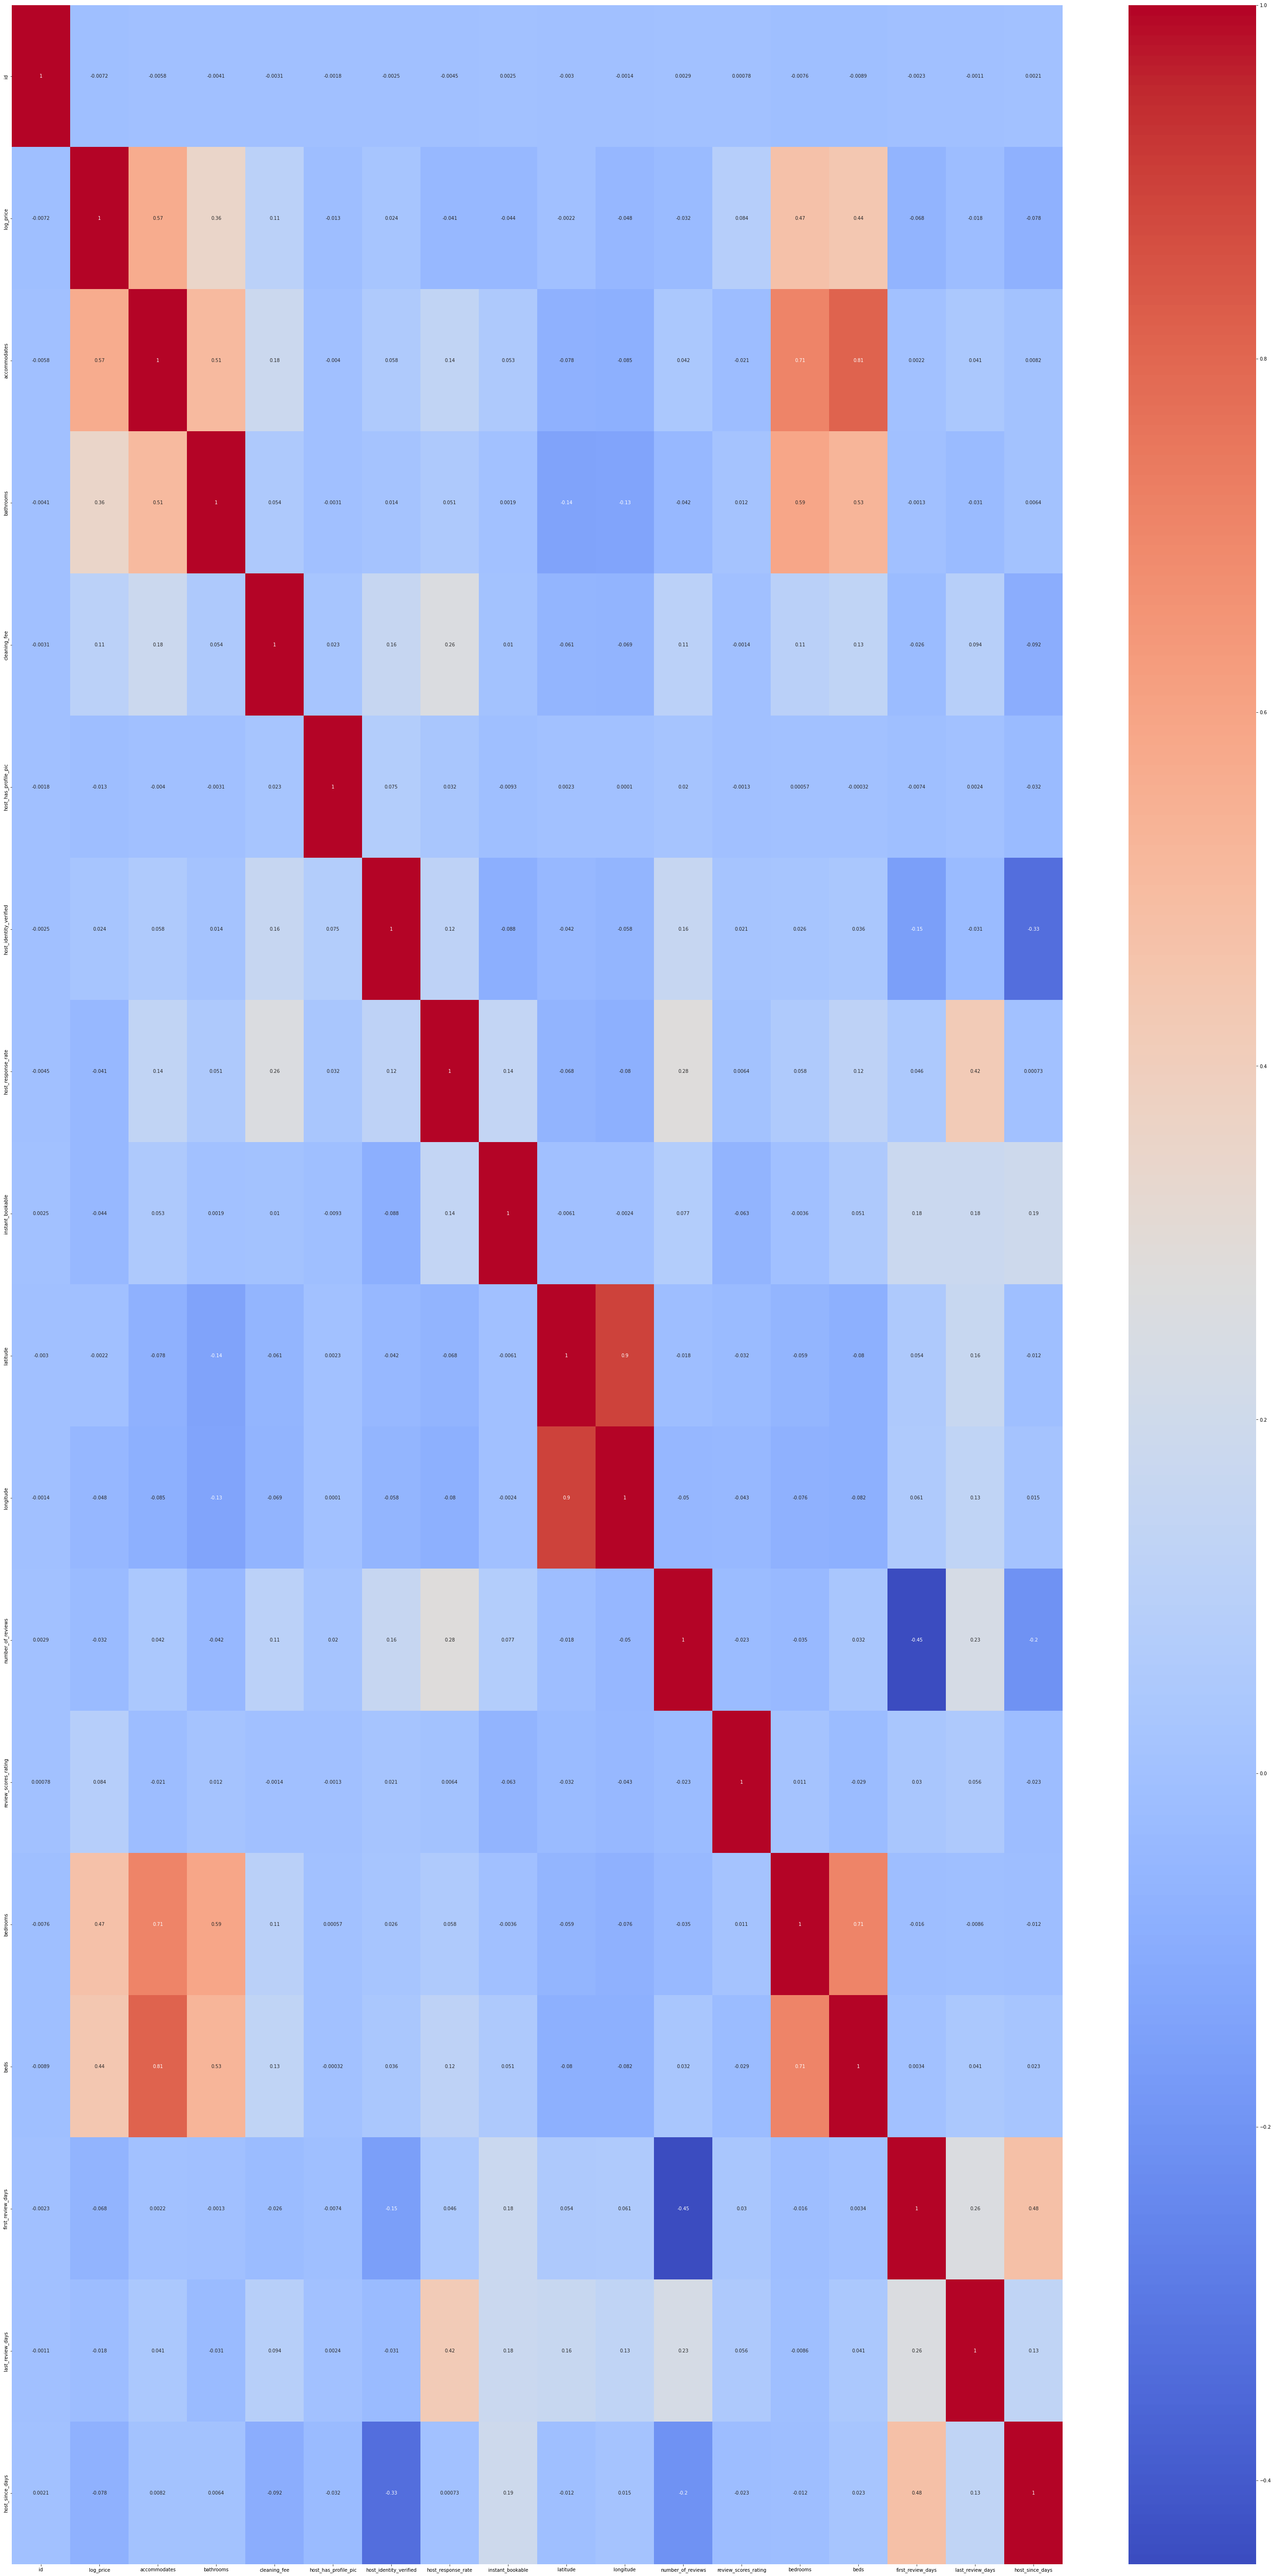

In [ ]:
plt.figure(figsize=(50,100))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
df['accommodates'].value_counts()

2     31854
4     12066
1      9434
3      7794
6      4969
5      3444
8      1795
7       946
10      701
16      301
9       270
12      264
14      104
11       79
15       54
13       36
Name: accommodates, dtype: int64

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,first_review_days,last_review_days,host_since_days
id,1.000000,-0.007178,-0.005759,-0.004058,-0.003059,-0.001765,-0.002473,-0.004509,0.002497,-0.003021,-0.001379,0.002945,0.000783,-0.007578,-0.008876,-0.002342,-0.001126,0.002094
log_price,-0.007178,1.000000,0.567574,0.355174,0.111191,-0.013171,0.024014,-0.041439,-0.044271,-0.002193,-0.047529,-0.032470,0.084180,0.473028,0.441953,-0.068205,-0.017987,-0.078258
accommodates,-0.005759,0.567574,1.000000,0.505490,0.182306,-0.003970,0.057689,0.137153,0.053093,-0.078309,-0.085160,0.041964,-0.021220,0.709214,0.810247,0.002166,0.041360,0.008159
bathrooms,-0.004058,0.355174,0.505490,1.000000,0.054134,-0.003146,0.014288,0.050717,0.001912,-0.137673,-0.134777,-0.041521,0.012340,0.589783,0.525699,-0.001349,-0.031190,0.006415
cleaning_fee,-0.003059,0.111191,0.182306,0.054134,1.000000,0.022654,0.162285,0.260923,0.010031,-0.060913,-0.068505,0.110204,-0.001435,0.105491,0.132089,-0.026394,0.093869,-0.092251
host_has_profile_pic,-0.001765,-0.013171,-0.003970,-0.003146,0.022654,1.000000,0.075312,0.031957,-0.009280,0.002262,0.000101,0.020362,-0.001277,0.000573,-0.000318,-0.007350,0.002373,-0.032258
host_identity_verified,-0.002473,0.024014,0.057689,0.014288,0.162285,0.075312,1.000000,0.121321,-0.087729,-0.041896,-0.058358,0.161881,0.020526,0.025537,0.035934,-0.154691,-0.031310,-0.333683
host_response_rate,-0.004509,-0.041439,0.137153,0.050717,0.260923,0.031957,0.121321,1.000000,0.142388,-0.067653,-0.080344,0.283490,0.006377,0.058420,0.121266,0.045711,0.418849,0.000734
instant_bookable,0.002497,-0.044271,0.053093,0.001912,0.010031,-0.009280,-0.087729,0.142388,1.000000,-0.006090,-0.002371,0.077276,-0.063312,-0.003586,0.051320,0.175276,0.177342,0.191958
latitude,-0.003021,-0.002193,-0.078309,-0.137673,-0.060913,0.002262,-0.041896,-0.067653,-0.006090,1.000000,0.896065,-0.017642,-0.031555,-0.059128,-0.080135,0.053966,0.164377,-0.011502


In [ ]:
df.corr().shape

(18, 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bee4e2fa0>,
      dtype=object)

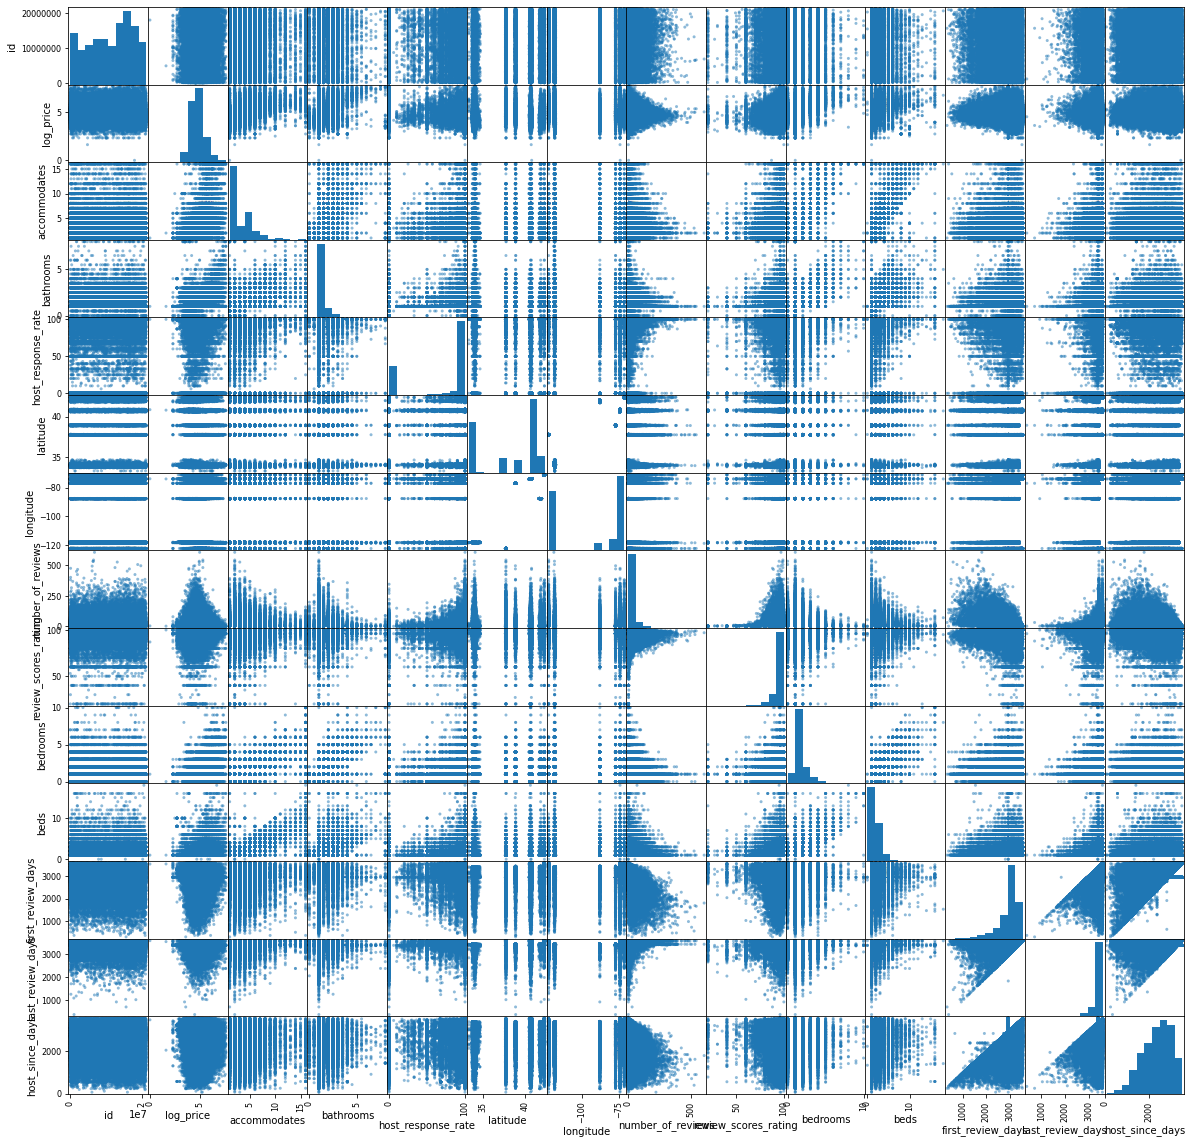

In [ ]:
final_df=df.select_dtypes(include=['int64','float64'])
pd.plotting.scatter_matrix(frame=final_df,figsize=(20,20))


In [ ]:
df.shape

(74111, 32)

In [ ]:
amenities={x for xs in df['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove( 'translation missing: en.hosting_amenity_49')
amenities.remove( 'translation missing: en.hosting_amenity_50')
amenities=list(amenities)

In [ ]:
amenities_df=pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(),columns=amenities,index=df.index)

In [ ]:
amenities_fin_df=pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(),columns=amenities,index=df.index)

In [ ]:
amenities_df

,Pets allowed,Stair gates,Grab-rails for shower and toilet,Buzzer/wireless intercom,Other,Bathtub,Cleaning before checkout,Hot tub,Bed linens,Air purifier,Pool,Table corner guards,EV charger,Pack ’n Play/travel crib,Wide doorway,Crib,First aid kit,Air conditioning,Waterfront,Oven,Fire extinguisher,Suitable for events,Bath towel,Single level home,Elevator in building,TV,Dishwasher,Washer,Stove,Hot water kettle,Cooking basics,Wide entryway,Dryer,Gym,Wireless Internet,Carbon monoxide detector,Doorman,Luggage dropoff allowed,Doorman Entry,Keypad,Handheld shower head,Heating,Family/kid friendly,Accessible-height toilet,Roll-in shower with chair,Pets live on this property,Indoor fireplace,Firm matress,Ethernet connection,Host greets you,...,Cable TV,Accessible-height bed,Wheelchair accessible,Room-darkening shades,Refrigerator,Flat smooth pathway to front door,Hand soap,Free parking on street,Ground floor access,Shampoo,Essentials,Private living room,Lock on bedroom door,Baby monitor,Hangers,Hand or paper towel,smooth pathway to front door,Safety card,Extra pillows and blankets,Self Check-In,Children’s books and toys,Dog(s),Children’s dinnerware,Garden or backyard,Private entrance,Wide clearance to bed,Smoking allowed,Beach essentials,Internet,Washer / Dryer,Outlet covers,Hot water,Long term stays allowed,Game console,Bathtub with shower chair,Kitchen,Lake access,Wide hallway clearance,Laptop friendly workspace,Fireplace guards,Pocket wifi,Toilet paper,Well-lit path to entrance,Path to entrance lit at night,Baby bath,Lockbox,Firm mattress,High chair,Cat(s),Smartlock
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,Fa

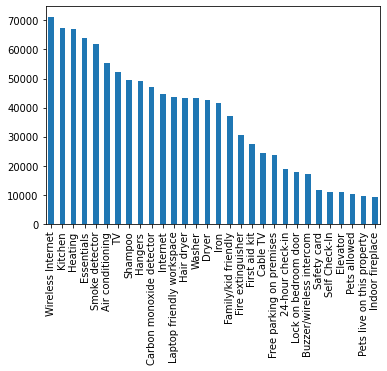

In [ ]:
amenities_df.astype('int64').sum().sort_values(ascending=False)[:30].plot(kind='bar')

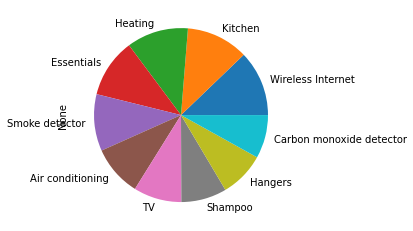

In [ ]:
amenities_df.astype('int64').sum().sort_values(ascending=False)[:10].plot(kind='pie')

In [ ]:
amenities_df['log_price']=df['log_price']
significant_amenities = amenities_df[amenities_df.columns[abs(amenities_df.corr()['log_price']) > 0.1]]
significant_amenities.corr().style.background_gradient(cmap='coolwarm')

,Suitable for events,TV,Washer,Dryer,Gym,Doorman,Heating,Family/kid friendly,Indoor fireplace,Hair dryer,24-hour check-in,Elevator,Iron,Cable TV,Lock on bedroom door,Private entrance,Kitchen,log_price
Suitable for events,1.000000,0.040222,0.069639,0.067433,0.044117,0.003104,0.014484,0.141289,0.101656,0.019236,0.032351,-0.019539,0.032373,0.031513,0.027072,0.037840,0.023048,0.115668
TV,0.040222,1.000000,0.179603,0.183641,0.096455,0.058271,0.198690,0.178125,0.112772,0.155172,0.134993,0.022898,0.194988,0.366258,-0.019267,0.079529,0.171318,0.263740
Washer,0.069639,0.179603,1.000000,0.955229,0.214726,0.127331,0.120450,0.145710,0.202510,0.106144,0.110634,0.114718,0.126951,0.141052,0.000578,0.021184,0.184220,0.165375
Dryer,0.067433,0.183641,0.955229,1.000000,0.215498,0.128946,0.127520,0.146663,0.200741,0.112180,0.114945,0.115637,0.132785,0.147454,-0.000752,0.022695,0.181384,0.171682
Gym,0.044117,0.096455,0.214726,0.215498,1.000000,0.370240,0.056707,0.081334,0.037021,0.048171,0.061189,0.208964,0.051737,0.081431,0.001286,-0.035944,0.055001,0.112624
Doorman,0.003104,0.058271,0.127331,0.128946,0.370240,1.000000,0.048259,0.035890,-0.031032,0.028167,0.093399,0.363187,0.021939,0.144634,-0.043748,-0.037537,0.038105,0.120424
Heating,0.014484,0.198690,0.120450,0.127520,0.056707,0.048259,1.000000,0.113242,0.072272,0.188469,0.120219,0.046342,0.195563,0.135583,0.041311,0.064433,0.221393,0.103929
Family/kid friendly,0.141289,0.178125,0.145710,0.146663,0.081334,0.035890,0.113242,1.000000,0.107101,0.158226,0.169187,-0.027414,0.163476,0.129245,-0.029357,0.120296,0.080797,0.290455
Indoor fireplace,0.101656,0.112772,0.202510,0.200741,0.037021,-0.031032,0.072272,0.107101,1.000000,0.075353,0.066856,-0.103908,0.088989,0.121928,0.002410,0.029402,0.065326,0.170569
Hair dryer,0.019236,0.155172,0.106144,0.112180,0.048171,0.028167,0.188469,0.158226,0.075353,1.000000,0.315211,-0.013885,0.619039,0.105986,0.136371,0.163816,0.074872,0.117526


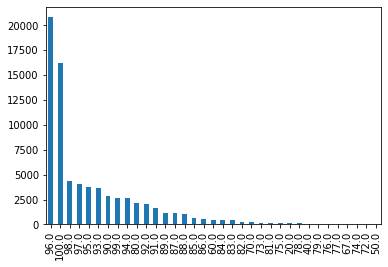

In [ ]:
df['review_scores_rating'].value_counts()[:50].plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7f4bdecfca90>,
 [Text(0.21800829071821606, 1.078180126499335, 'NYC'),
  Text(-0.9361805151747322, -0.5775517665172301, 'LA'),
  Text(0.22554413075076182, -1.0766289263640856, 'SF'),
  Text(0.7256214338188367, -0.8267245821812097, 'DC'),
  Text(0.9896917091384346, -0.48011490381224814, 'Chicago'),
  Text(1.0881348617515352, -0.1611289007005493, 'Boston')])

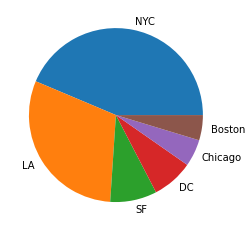

In [ ]:
y=df['city'].value_counts()
labels=np.array(df['city'].value_counts().keys())
plt.pie(y,labels=labels)
#NYC,LA and SF have larger proportion of airbnb properties

([<matplotlib.patches.Wedge at 0x7f4bdeccefa0>,
 [Text(0.21686555497727497, 1.0784105577489487, 'strict'),
  Text(-0.9326870307062588, -0.5831765622453824, 'flexible'),
  Text(0.7512276820834195, -0.8035278275651522, 'moderate'),
  Text(1.0999789329708047, -0.006807864599880538, 'super_strict_30'),
  Text(1.0999997143652738, -0.0007927145237020169, 'super_strict_60')])

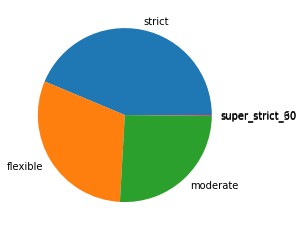

In [ ]:
y=df['cancellation_policy'].value_counts()
labels=np.array(df['cancellation_policy'].value_counts().keys())
plt.pie(y,labels=labels)

We have log_price but for more simplicity we can convert log_price into price

In [ ]:
df['Price']=df['log_price'].apply(np.exp)

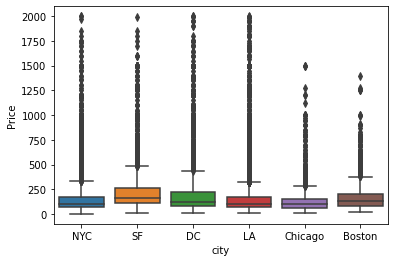

In [ ]:
sns.boxplot(data=df,x='city',y='Price')
#The property prices for SF are highest and NYC is the lowest with max value being around 300 for SF and 
#Chicago having the least max price of Airbnb property

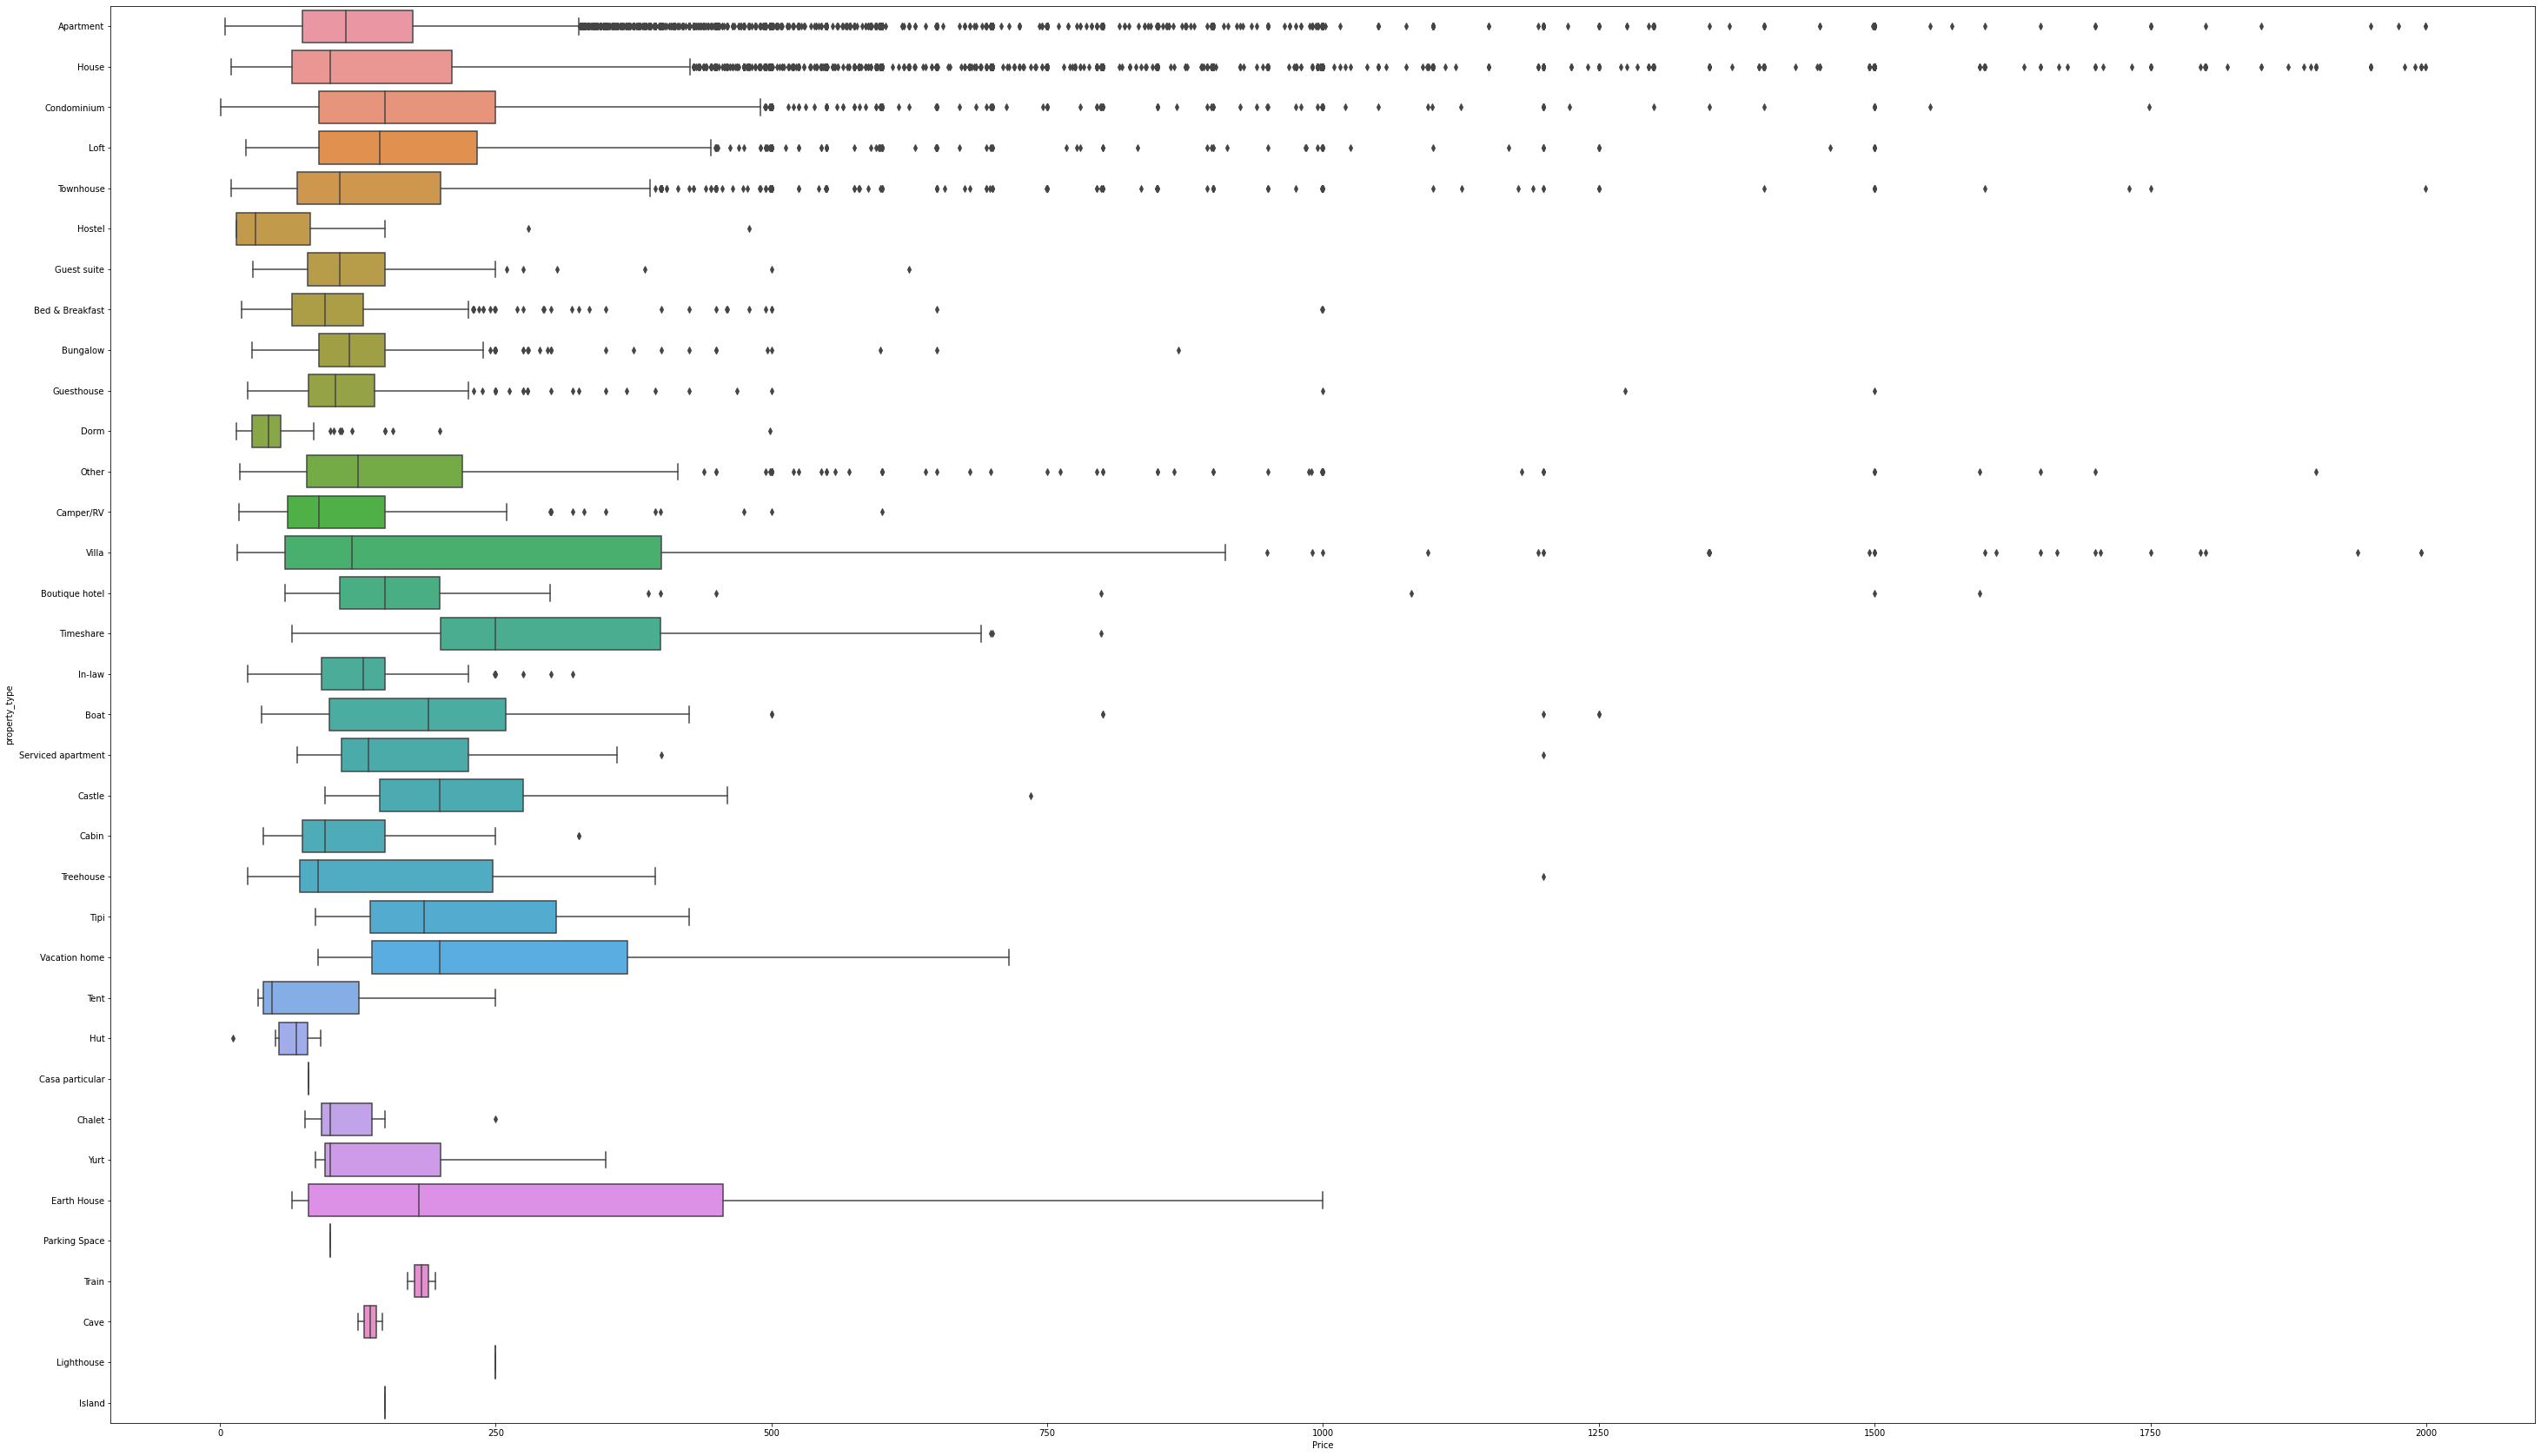

In [ ]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df,y='property_type',x='Price')
#the most cheap are hostels whereas earth houses are the most expensive. Apartments,houses and condos are cheap but also can be expensive in some cases

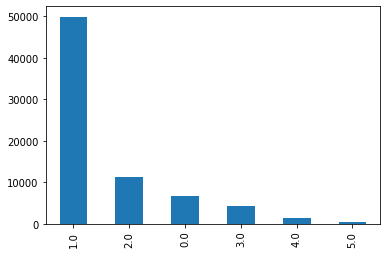

In [ ]:
df['bedrooms'].value_counts()[:5].plot(kind='bar')
#most rentals offer one bedroom per property followed by 2bedroom

([<matplotlib.patches.Wedge at 0x7f4bdebb4040>,
 [Text(-1.095714572943257, 0.09700296201547681, 'Real Bed'),
  Text(1.0885075452256336, -0.1585916895264866, 'Futon'),
  Text(1.0957473992694373, -0.09663144930230645, 'Pull-out Sofa'),
  Text(1.0989859672222393, -0.047221222438636336, 'Airbed'),
  Text(1.099929014050942, -0.012496561483999278, 'Couch')])

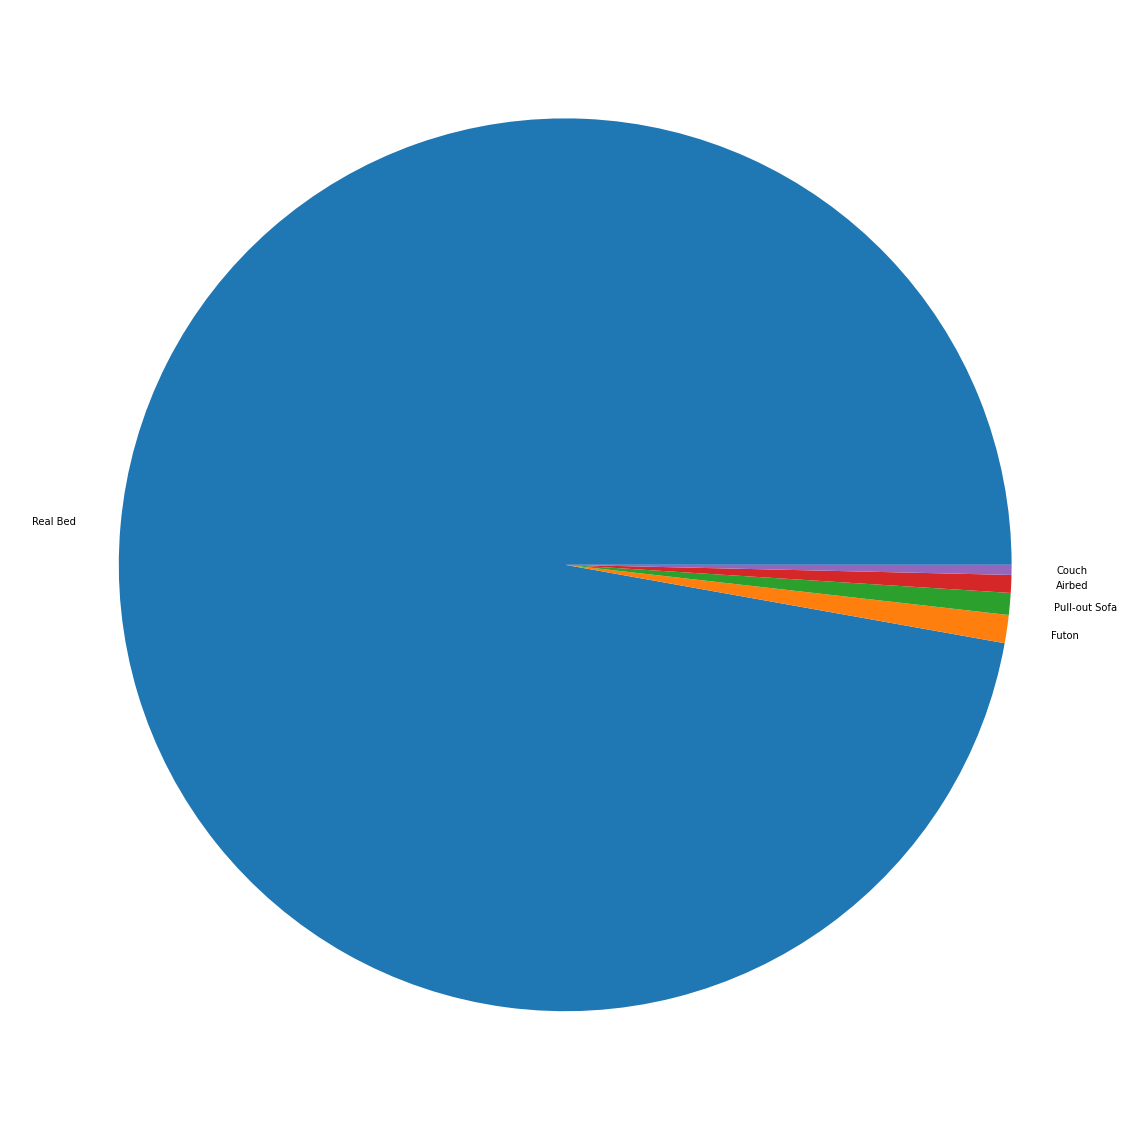

In [ ]:
plt.figure(figsize=(20,100))
plt.pie(df['bed_type'].value_counts(),labels=df['bed_type'].value_counts().keys())

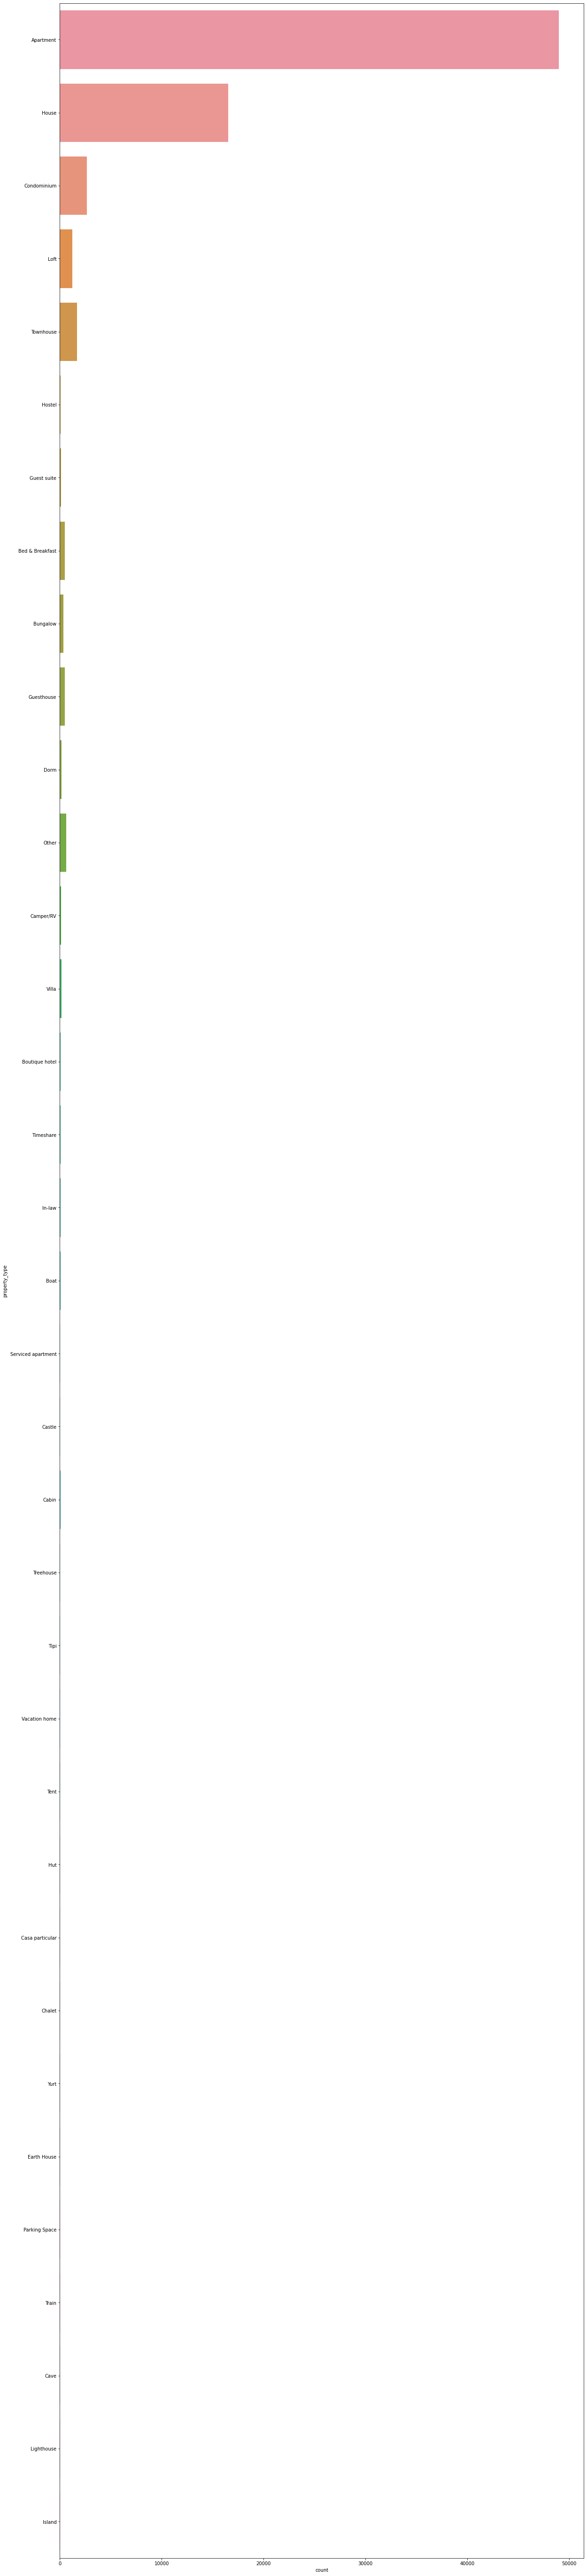

In [ ]:
plt.figure(figsize=(20,100))
sns.countplot(y=df['property_type'])
#A major part of airbnb rentals are mainly apartments,house or condos

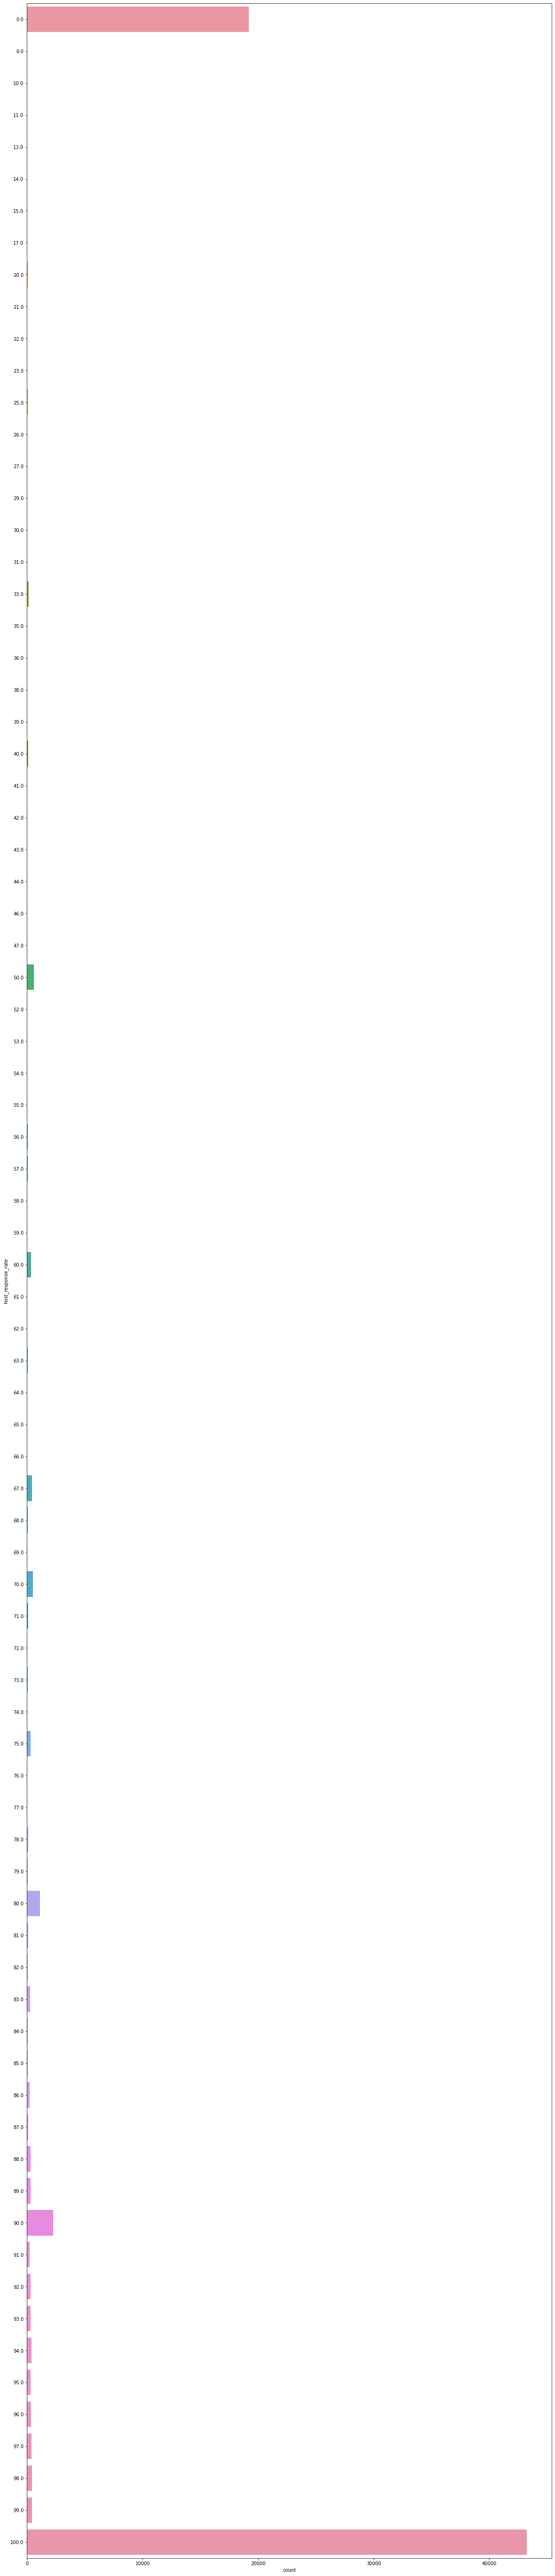

In [ ]:
plt.figure(figsize=(20,100))
sns.countplot(data=df,y='host_response_rate')

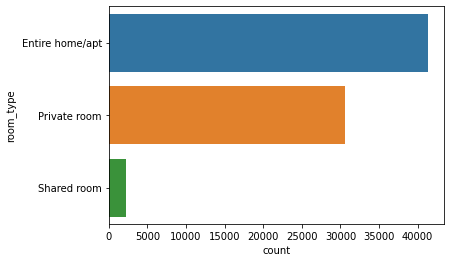

In [ ]:
sns.countplot(data=df,y='room_type')

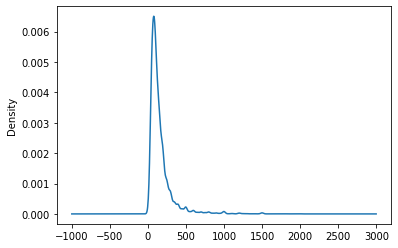

In [ ]:
df['Price'].plot(kind='density')

city
Boston     AxesSubplot(0.125,0.125;0.775x0.755)
Chicago    AxesSubplot(0.125,0.125;0.775x0.755)
DC         AxesSubplot(0.125,0.125;0.775x0.755)
LA         AxesSubplot(0.125,0.125;0.775x0.755)
NYC        AxesSubplot(0.125,0.125;0.775x0.755)
SF         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

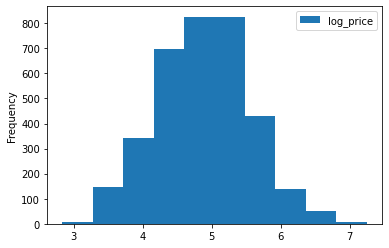

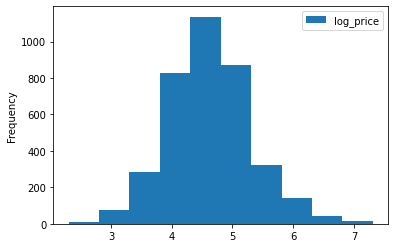

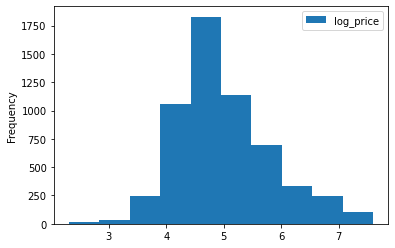

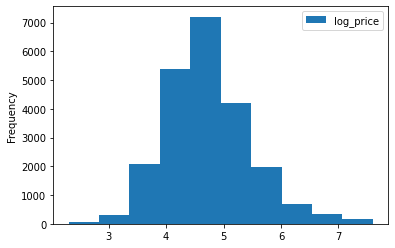

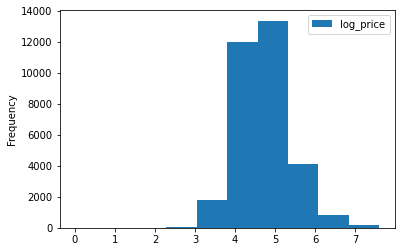

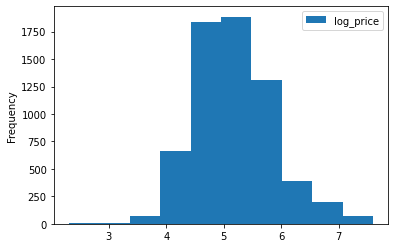

In [ ]:
df[['log_price','city']].groupby(by='city').plot(kind='hist')

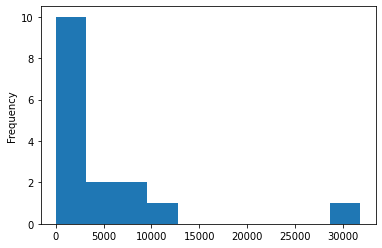

In [ ]:
df['accommodates'].value_counts().plot(kind='hist')

([<matplotlib.patches.Wedge at 0x7f4bde017970>,
 [Text(-0.7467882347255199, 0.8076554540616574, 'False'),
  Text(0.7467882347255201, -0.8076554540616572, 'True')])

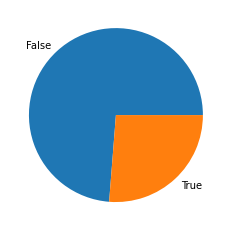

In [ ]:
y=df['instant_bookable'].value_counts()
plt.pie(y,labels=df['instant_bookable'].value_counts().keys())

([<matplotlib.patches.Wedge at 0x7f4bddfd58b0>,
 [Text(-0.737945315295097, 0.8157430426513119, 'True'),
  Text(0.7379453916704696, -0.8157429735598815, 'False')])

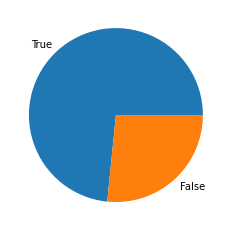

In [ ]:
y=df['cleaning_fee'].value_counts()
plt.pie(y,labels=df['cleaning_fee'].value_counts().keys())

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


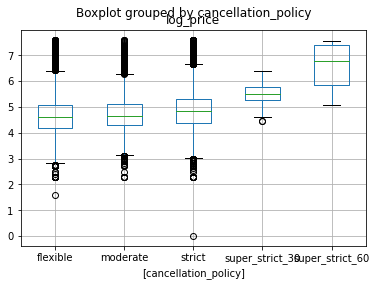

In [ ]:
df[['cancellation_policy','log_price']].boxplot(by='cancellation_policy')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


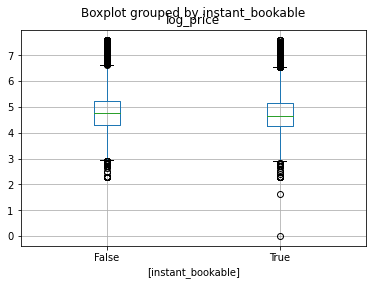

In [ ]:
df[['instant_bookable','log_price']].boxplot(by='instant_bookable')

In [ ]:
df[['city','neighbourhood','log_price']].groupby(by=['city','neighbourhood']).agg(['max','mean','count'])

log_price                
                                   max      mean count
city   neighbourhood                                  
Boston Allston-Brighton       6.906755  4.416305   414
       Back Bay               7.130899  5.284117   296
       Beacon Hill            6.645091  5.215321   203
       Brookline              4.828314  4.807903     2
       Cambridge              5.988961  5.755211     2
...                                ...       ...   ...
SF     Twin Peaks             7.090077  5.192006    76
       Union Square           6.551080  5.109113    35
       Visitacion Valley      6.214608  4.674289    37
       West Portal            5.298317  4.759170    11
       Western Addition/NOPA  7.313220  5.222118   397

[643 rows x 3 columns]

In [ ]:
df.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,first_review_days,last_review_days,host_since_days,Price
0,6901257,5.010635,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,True,True,0.0,2012-03-26,False,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,3091,3121,1546,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,True,False,100.0,2017-06-19,True,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,3504,3553,3457,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"[TV, Cable TV, Wireless Internet, Air conditio...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,True,True,100.0,2016-10-25,True,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,3407,3544,3220,145.0
3,13418779,6.620073,House,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,True,True,0.0,2015-04-19,False,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,96.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,2935,3360,2665,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,True,True,100.0,2015-03-01,True,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,2688,3309,2616,115.0
5,12422935,4.442651,Apartment,Private room,"[TV, Wireless Internet, Heating, Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,2017-08-27,True,True,100.0,2017-06-07,True,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,3526,3535,3445,85.0
6,11825529,4.418841,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",3,1.0,Real Bed,moderate,True,LA,Warm and cozy studio with full kitchen and bat...,2017-03-10,True,False,100.0,2017-03-03,True,2017-04-21,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,3356,3398,3349,83.0
7,13971273,4.787492,Condominium,Entire home/apt,"[TV, Cable TV, Wireless Internet, Wheelchair a...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,2016-12-16,True,True,100.0,2013-05-18,False,2017-04-12,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,3272,3389,1964,120.0
8,180792,4.787492,House,Private room,"[TV, Cable TV, Wireless Internet, Pets live on...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,2016-02-13,True,False,100.0,2015-06-04,False,2017-09-24,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,2965,3554,2711,120.0
9,5385260,3.583519,House,Private room,"[Wireless Internet, Air conditioning, Kitchen,...",2,1.0,Real Bed,modera

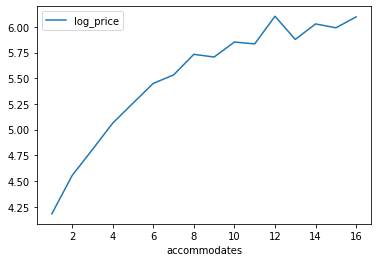

In [ ]:
df[['accommodates','log_price']].groupby(by='accommodates').mean().plot()

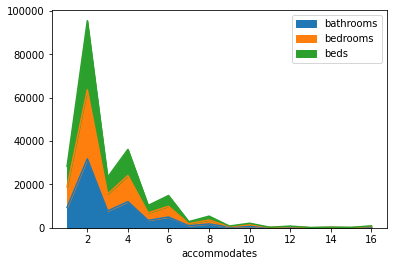

In [ ]:
df[['accommodates','bathrooms','bedrooms','beds']].groupby(by='accommodates').count().plot(kind='area')

In [ ]:
df[['review_scores_rating','log_price']].agg(['min','mean','max'])

,review_scores_rating,log_price
min,20.000000,0.000000
mean,94.503434,4.782069
max,100.000000,7.600402


In [ ]:
model_df=df

In [ ]:
#model_df=model_df.drop(columns=['city-neigh'])
model_df['city-neigh']=model_df['city']+"-"+model_df['neighbourhood']

In [ ]:
model_df['city-neigh']=np.where(model_df['city-neigh'].isna(),model_df['city'],model_df['city-neigh'])

In [ ]:
model_df[['id','city','city-neigh','neighbourhood']].head(10)

,id,city,city-neigh,neighbourhood
0,6901257,NYC,NYC-Brooklyn Heights,Brooklyn Heights
1,6304928,NYC,NYC-Hell's Kitchen,Hell's Kitchen
2,7919400,NYC,NYC-Harlem,Harlem
3,13418779,SF,SF-Lower Haight,Lower Haight
4,3808709,DC,DC-Columbia Heights,Columbia Heights
5,12422935,SF,SF-Noe Valley,Noe Valley
6,11825529,LA,LA,NaN
7,13971273,LA,LA-Downtown,Downtown
8,180792,SF,SF-Richmond District,Richmond District
9,5385260,LA,LA,NaN


In [ ]:
model_df['city-neigh']

0        NYC-Brooklyn Heights
1          NYC-Hell's Kitchen
2                  NYC-Harlem
3             SF-Lower Haight
4         DC-Columbia Heights
                 ...         
74106        NYC-Williamsburg
74107        LA-Hermosa Beach
74108        NYC-Williamsburg
74109        NYC-West Village
74110           LA-Long Beach
Name: city-neigh, Length: 74111, dtype: object

([<matplotlib.patches.Wedge at 0x7f4bdd9c7ca0>,
 [Text(1.0712427268306188, 0.24987801066220353, 'LA'),
  Text(0.9203223262801244, 0.6025004695021742, 'NYC-Williamsburg'),
  Text(0.7720509473075321, 0.7835415335268083, 'NYC-Bedford-Stuyvesant'),
  Text(0.6376401358646888, 0.8963342329368333, 'NYC-Bushwick'),
  Text(0.5189334922691253, 0.9699010416539257, 'NYC-Upper West Side'),
  Text(0.4009531316895236, 1.0243225010651498, 'LA-Mid-Wilshire'),
  Text(0.27837153219371424, 1.0641941975335725, 'NYC-Harlem'),
  Text(0.15524551636599745, 1.0889898207275654, 'LA-Hollywood'),
  Text(0.0335912945121511, 1.0994869826118898, "NYC-Hell's Kitchen"),
  Text(-0.0838747312717467, 1.0967976246573898, 'LA-Venice'),
  Text(-0.1961182651526633, 1.0823759171718068, 'NYC-Upper East Side'),
  Text(-0.29974159999374195, 1.0583737398637552, 'NYC-Crown Heights'),
  Text(-0.3871527008077882, 1.0296177864903244, 'NYC-Astoria'),
  Text(-0.4615941297524352, 0.9984642504256686, 'NYC-Lower East Side'),
  Text(-0.5301

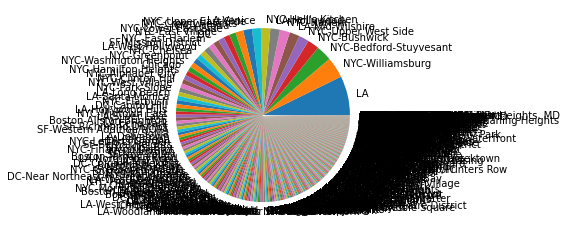

In [ ]:
y=model_df['city-neigh'].value_counts()
label=model_df['city-neigh'].value_counts().keys()
plt.pie(y,labels=label)

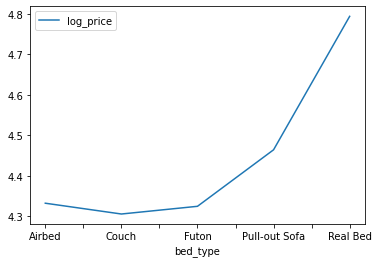

In [ ]:
model_df[['bed_type','log_price']].groupby(by=['bed_type']).mean().plot()

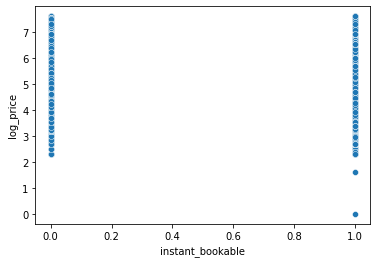

In [ ]:
sns.scatterplot(data=model_df,x='instant_bookable',y='log_price')

In [ ]:
#drop columns like beds,bedrooms,bathrooms since these are highly correlated with accommodates
#Also, 
model_df=model_df.drop(columns=['bathrooms','bedrooms','beds','instant_bookable','bed_type'])

In [ ]:
res=model_df.select_dtypes('object')

In [ ]:
res.columns

Index(['property_type', 'room_type', 'amenities', 'cancellation_policy',
       'city', 'description', 'name', 'neighbourhood', 'thumbnail_url',
       'zipcode', 'city-neigh'],
      dtype='object')

In [ ]:
#columns like zipcode,city,,name,thumbnail_url,neighbourhood,description do not affect our analysis
columns_to_drop=[ 'city', 'description', 'name', 'neighbourhood', 'thumbnail_url','zipcode']
model_df=model_df.drop(columns=columns_to_drop)

In [ ]:
model_df.dtypes

id                                 int64
log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
cancellation_policy               object
cleaning_fee                        bool
first_review              datetime64[ns]
host_has_profile_pic                bool
host_identity_verified              bool
host_response_rate               float64
host_since                datetime64[ns]
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
number_of_reviews                  int64
review_scores_rating             float64
first_review_days                  int64
last_review_days                   int64
host_since_days                    int64
Price                            float64
city-neigh                        object
dtype: object

In [ ]:
model_df=model_df.drop(columns=['amenities'])

In [ ]:
model_df['id']=model_df.index
significant_amenities['id']=significant_amenities.index  

In [ ]:
significant_amenities.columns

Index(['Suitable for events', 'TV', 'Washer', 'Dryer', 'Gym', 'Doorman',
       'Heating', 'Family/kid friendly', 'Indoor fireplace', 'Hair dryer',
       '24-hour check-in', 'Elevator', 'Iron', 'Cable TV',
       'Lock on bedroom door', 'Private entrance', 'Kitchen', 'id'],
      dtype='object')

In [ ]:
significant_amenities=significant_amenities.drop(columns=['log_price'])

In [ ]:
model_df=model_df.merge(right=significant_amenities,on='id')

In [ ]:
model_df.head(10)

,id,log_price,property_type,room_type,accommodates,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,first_review_days,last_review_days,host_since_days,Price,city-neigh,Suitable for events,TV,Washer,Dryer,Gym,Doorman,Heating,Family/kid friendly,Indoor fireplace,Hair dryer,24-hour check-in,Elevator,Iron,Cable TV,Lock on bedroom door,Private entrance,Kitchen
0,0,5.010635,Apartment,Entire home/apt,3,strict,True,2016-06-18,True,True,0.0,2012-03-26,2016-07-18,40.696524,-73.991617,2,100.0,3091,3121,1546,150.0,NYC-Brooklyn Heights,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,True
1,1,5.129899,Apartment,Entire home/apt,7,strict,True,2017-08-05,True,False,100.0,2017-06-19,2017-09-23,40.766115,-73.989040,6,93.0,3504,3553,3457,169.0,NYC-Hell's Kitchen,False,False,True,True,False,False,True,True,False,True,False,False,True,False,False,False,True
2,2,4.976734,Apartment,Entire home/apt,5,moderate,True,2017-04-30,True,True,100.0,2016-10-25,2017-09-14,40.808110,-73.943756,10,92.0,3407,3544,3220,145.0,NYC-Harlem,False,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True
3,3,6.620073,House,Entire home/apt,4,flexible,True,NaT,True,True,0.0,2015-04-19,NaT,37.772004,-122.431619,0,96.0,2935,3360,2665,750.0,SF-Lower Haight,False,True,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True
4,4,4.744932,Apartment,Entire home/apt,2,moderate,True,2015-05-12,True,True,100.0,2015-03-01,2017-01-22,38.925627,-77.034596,4,40.0,2688,3309,2616,115.0,DC-Columbia Heights,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
5,5,4.442651,Apartment,Private room,2,strict,True,2017-08-27,True,True,100.0,2017-06-07,2017-09-05,37.753164,-122.429526,3,100.0,3526,3535,3445,85.0,SF-Noe Valley,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6,6,4.418841,Apartment,Entire home/apt,3,moderate,True,2017-03-10,True,False,100.0,2017-03-03,2017-04-21,33.980454,-118.462821,15,97.0,3356,3398,3349,83.0,LA,False,True,True,True,True,False,True,True,False,True,False,False,False,False,False,False,True
7,7,4.787492,Condominium,Entire home/apt,2,moderate,True,2016-12-16,True,True,100.0,2013-05-18,2017-04-12,34.046737,-118.260439,9,93.0,3272,3389,1964,120.0,LA-Downtown,False,True,True,True,False,True,True,True,False,True,False,False,False,True,True,False,True
8,8,4.787492,House,Private room,2,moderate,True,2016-02-13,True,False,100.0,2015-06-04,2017-09-24,37.781128,-122.501095,159,99.0,2965,3554,2711,120.0,SF-Richmond District,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False
9,9,3.583519,House,Private room,2,moderate,True,2017-04-03,True,False,100.0,2017-03-12,2017-04-16,33.992563,-117.895997,2,90.0,3380,3393,3358,36.0,LA,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,True


In [ ]:
model_df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
accommodates                  0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                  188
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating          0
first_review_days             0
last_review_days              0
host_since_days               0
Price                         0
city-neigh                    0
Suitable for events           0
TV                            0
Washer                        0
Dryer                         0
Gym                           0
Doorman                       0
Heating                       0
Family/kid friendly           0
Indoor fireplace              0
Hair dry

In [ ]:
model_df=model_df[(model_df['cancellation_policy']=='strict') | (model_df['cancellation_policy']=='moderate') | (model_df['cancellation_policy']=='flexible')]

In [ ]:
other_columns=['first_review','last_review','last_review_days','Price','Lock on bedroom door','host_since']

In [ ]:
model_df=model_df.drop(columns=other_columns)

In [ ]:
top_neigh=model_df[['city-neigh']].value_counts().sort_values(ascending=False).head(200)

In [ ]:
top_neigh

city-neigh            
LA                        5398
NYC-Williamsburg          2862
NYC-Bedford-Stuyvesant    2166
NYC-Bushwick              1601
NYC-Upper West Side       1395
                          ... 
Boston-Roslindale           75
SF-Twin Peaks               75
Chicago-Avondale            74
Chicago-Old Town            72
LA-Valley Glen              72
Length: 200, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
model_df['property_type_num']=label_encoder.fit_transform(model_df['property_type'])
model_df['room_type_num']=label_encoder.fit_transform(model_df['room_type'])
model_df['cancellation_policy_num']=label_encoder.fit_transform(model_df['cancellation_policy'])
model_df['city_neigh_num']=label_encoder.fit_transform(model_df['city-neigh'])

In [ ]:
model_df.shape

(73982, 43)

In [ ]:
model_df.head(10)

,id,log_price,property_type,room_type,accommodates,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,first_review_days,last_review_days,host_since_days,Price,city-neigh,Suitable for events,TV,Washer,Dryer,Gym,Doorman,Heating,Family/kid friendly,Indoor fireplace,Hair dryer,24-hour check-in,Elevator,Iron,Cable TV,Lock on bedroom door,Private entrance,Kitchen,property_type_num,room_type_num,cancellation_policy_num,city_neigh_num
0,0,5.010635,Apartment,Entire home/apt,3,strict,True,2016-06-18,True,True,0.0,2012-03-26,2016-07-18,40.696524,-73.991617,2,100.0,3091,3121,1546,150.0,NYC-Brooklyn Heights,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,True,0,0,2,410
1,1,5.129899,Apartment,Entire home/apt,7,strict,True,2017-08-05,True,False,100.0,2017-06-19,2017-09-23,40.766115,-73.989040,6,93.0,3504,3553,3457,169.0,NYC-Hell's Kitchen,False,False,True,True,False,False,True,True,False,True,False,False,True,False,False,False,True,0,0,2,478
2,2,4.976734,Apartment,Entire home/apt,5,moderate,True,2017-04-30,True,True,100.0,2016-10-25,2017-09-14,40.808110,-73.943756,10,92.0,3407,3544,3220,145.0,NYC-Harlem,False,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True,0,0,1,477
3,3,6.620073,House,Entire home/apt,4,flexible,True,NaT,True,True,0.0,2015-04-19,NaT,37.772004,-122.431619,0,96.0,2935,3360,2665,750.0,SF-Lower Haight,False,True,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,17,0,0,617
4,4,4.744932,Apartment,Entire home/apt,2,moderate,True,2015-05-12,True,True,100.0,2015-03-01,2017-01-22,38.925627,-77.034596,4,40.0,2688,3309,2616,115.0,DC-Columbia Heights,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0,1,145
5,5,4.442651,Apartment,Private room,2,strict,True,2017-08-27,True,True,100.0,2017-06-07,2017-09-05,37.753164,-122.429526,3,100.0,3526,3535,3445,85.0,SF-Noe Valley,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,1,2,623
6,6,4.418841,Apartment,Entire home/apt,3,moderate,True,2017-03-10,True,False,100.0,2017-03-03,2017-04-21,33.980454,-118.462821,15,97.0,3356,3398,3349,83.0,LA,False,True,True,True,True,False,True,True,False,True,False,False,False,False,False,False,True,0,0,1,231
7,7,4.787492,Condominium,Entire home/apt,2,moderate,True,2016-12-16,True,True,100.0,2013-05-18,2017-04-12,34.046737,-118.260439,9,93.0,3272,3389,1964,120.0,LA-Downtown,False,True,True,True,False,True,True,True,False,True,False,False,False,True,True,False,True,11,0,1,263
8,8,4.787492,House,Private room,2,moderate,True,2016-02-13,True,False,100.0,2015-06-04,2017-09-24,37.781128,-122.501095,159,99.0,2965,3554,2711,120.0,SF-Richmond District,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False,17,1,1,633
9,9,3.583519,House,Private room,2,moderate,True,2017-04-03,True,False,100.0,2017-03-12,2017-04-16,33.992563,-117.895997,2,90.0,3380,3393,3358,36.0,LA,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,True,17,1,1,231


In [ ]:
model_df_vectorized=model_df.drop(columns=['property_type','room_type','cancellation_policy','city-neigh'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
model_df_vectorized=model_df_vectorized.drop(columns=other_columns)

In [ ]:
model_df_vectorized.dtypes

id                                  int64
log_price                         float64
accommodates                        int64
cleaning_fee                         bool
first_review               datetime64[ns]
host_has_profile_pic                 bool
host_identity_verified               bool
host_response_rate                float64
host_since                 datetime64[ns]
last_review                datetime64[ns]
latitude                          float64
longitude                         float64
number_of_reviews                   int64
review_scores_rating              float64
first_review_days                   int64
last_review_days                    int64
host_since_days                     int64
Price                             float64
Suitable for events                  bool
TV                                   bool
Washer                               bool
Dryer                                bool
Gym                                  bool
Doorman                           

In [ ]:
X=model_df_vectorized.drop(columns=['log_price'])
Y=model_df_vectorized['log_price']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
lr_m=LinearRegression()
lr_model=lr_m.fit(X_train,Y_train)

In [ ]:
predictions_result=lr_model.predict(X_test)

In [ ]:
lr_model.score(X_test,Y_test)

0.557751230180277

In [ ]:
predictions_result

array([4.37684179, 4.84656213, 5.20589748, ..., 4.08519297, 5.82717145,
       5.17148619])

In [ ]:
decision_reg_model=DecisionTreeRegressor(max_depth=2)
decision_model=decision_reg_model.fit(X_train,Y_train)

In [ ]:
decision_model.score(X_test,Y_test)

0.44092894414445283

In [ ]:
decision_reg_model=DecisionTreeRegressor(max_depth=7)
decision_model=decision_reg_model.fit(X_train,Y_train)

In [ ]:
preds=decision_model.fit(X_test,Y_test)

In [ ]:
preds.feature_importances_

array([2.08216724e-03, 1.88159134e-01, 9.39995050e-05, 0.00000000e+00,
       0.00000000e+00, 1.74821369e-02, 1.69338213e-02, 7.44240716e-02,
       2.87707183e-02, 1.02498919e-02, 3.63907013e-03, 7.07110093e-04,
       0.00000000e+00, 0.00000000e+00, 1.04552508e-03, 0.00000000e+00,
       1.24847786e-03, 0.00000000e+00, 2.73047931e-04, 0.00000000e+00,
       6.53429267e-05, 0.00000000e+00, 0.00000000e+00, 3.75279507e-03,
       0.00000000e+00, 1.04569804e-03, 0.00000000e+00, 0.00000000e+00,
       4.88012374e-03, 6.10694851e-01, 0.00000000e+00, 3.44520174e-02])

In [ ]:
decision_model.score(X_test,Y_test)

0.600243050106555